<a href="https://colab.research.google.com/github/julienVLNT/python-sandbox/blob/main/machine-learning/sklearn_06_randomized_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


**Julien VALENTIN**, **mars 2022**, d'après 

> [Machine learning in Python with scikit-learn](https://www.fun-mooc.fr/fr/cours/machine-learning-python-scikit-learn/) d'I.N.R.I.A sur [F.U.N](https://www.fun-mooc.fr/fr/)

### Import

In [2]:
!rm adult-census.csv && wget -O adult-census.csv https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/57f2e69a976136a9d1f9409b69ef0d6b3509903c/datasets/adult-census.csv

--2022-03-30 07:03:57--  https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/57f2e69a976136a9d1f9409b69ef0d6b3509903c/datasets/adult-census.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5383740 (5.1M) [text/plain]
Saving to: ‘adult-census.csv’

adult-census.csv    100%[===================>]   5.13M  --.-KB/s    in 0.08s   

2022-03-30 07:03:57 (63.6 MB/s) - ‘adult-census.csv’ saved [5383740/5383740]



In [3]:
import pandas as pd

adult_census = pd.read_csv("adult-census.csv")
adult_census.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


Attention ! Ici, les dix premiers éléments comparés à `.info()` trahissent un problème : les caractères `?` n'ont pas été reconnus comme étant des données manquantes.

In [5]:
adult_census = pd.read_csv("adult-census.csv", na_values=[' ?'])
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


C'est mieux. Cela ne veut pas dire qu'il n'y en a pas d'autres. On pourrait systématiser leur recherche avec `.value_counts()`

In [6]:
for name in adult_census.columns:
    if adult_census[name].dtypes == object:
        print(adult_census[name].value_counts())
        print(80*"-")

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64
--------------------------------------------------------------------------------
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64
--------------------------------------------------------------------------------
 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 M

### Séparation des prédicteurs et de la classe à prédire

In [7]:
target_name = "class"
target = adult_census[target_name]
target.value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

On supprime l'attribut `education-num`, qui porte la même information que `education`.

In [8]:
data = adult_census.drop(columns=[target_name, "education-num"])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


### Séparation en données d'entraînement et de test

In [9]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

### Modélisation

In [10]:
from sklearn import set_config
set_config(display="diagram")

On commence par proposer une étape de pré-traitement.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('cat_preprocessor', categorical_preprocessor, categorical_columns)],
    remainder='passthrough', sparse_threshold=0)

On modélise le problème à l'aide d'un `HistGradientBoostingClassifier` et on implémente le pipeline.

In [12]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4)),
])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

### Paramètres d'optimisation

On souhaite optimiser selon cinq paramètres :
- `learning_rate`
- `max_leaf_nodes`
- `l2_regularization`
- `min_samples_leaf`
- `max_bins`

Les deux premiers ont été cherchés dans le notebook précédent selon une recherche systématique avec l'objet `GridSearchCV` et ses méthodes. Lorsque l'espace d'hyper-paramètres est de grande dimension, une méthode d'exploration stochastique est plus adaptée. C'est le cas ici. L'objet `GridSearchCV` demande d'explorer une grille, une discrétisation de l'espace des hyper-paramètres. L'exploration stochastique demande au contraire une distribution des paramètres plutôt qu'une grille de valeurs. Ici, on crée une distribution `loguniform` entière pour générer des candidats.

In [13]:
from scipy.stats import loguniform

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

Il ne reste qu'à implémenter la recherche stochastique.

In [14]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'classifier__l2_regularization': loguniform(1e-6, 1e3),
    'classifier__learning_rate': loguniform(0.001, 10),
    'classifier__max_leaf_nodes': loguniform_int(2, 256),
    'classifier__min_samples_leaf': loguniform_int(1, 100),
    'classifier__max_bins': loguniform_int(2, 255),
}

model_random_search = RandomizedSearchCV(
    model, param_distributions=param_distributions, n_iter=10,
    cv=5, verbose=1,
)
model_random_search.fit(data_train, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 1min 35s, sys: 1.66 s, total: 1min 37s
Wall time: 1min 6s


On s'intéresse maintenant aux scores du modèle

In [15]:
accuracy = model_random_search.score(data_test, target_test)

print(f"The test accuracy score of the best model is "
      f"{accuracy:.2f}")

The test accuracy score of the best model is 0.87


In [16]:
from pprint import pprint

print("The best parameters are:")
pprint(model_random_search.best_params_)

The best parameters are:
{'classifier__l2_regularization': 706.8084102014384,
 'classifier__learning_rate': 1.5274793753313742,
 'classifier__max_bins': 72,
 'classifier__max_leaf_nodes': 10,
 'classifier__min_samples_leaf': 2}


On inspecte enfin les performances du modèle.

In [17]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

column_results = [
    f"param_{name}" for name in param_distributions.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_random_search.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False)
cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,l2_regularization,learning_rate,max_leaf_nodes,min_samples_leaf,max_bins,mean_test_score,std_test_score,rank_test_score
6,706.80841,1.527479,10,2,72,0.857006,0.002906,1
0,0.000099,0.017546,238,2,43,0.851656,0.002146,2
5,0.000001,0.817556,7,4,4,0.814829,0.000591,3
1,0.000007,0.279903,21,6,3,0.808277,0.002544,4
9,154.062223,0.087173,13,3,2,0.802053,0.003308,5
3,0.000007,0.002287,5,7,15,0.758947,0.000013,6
7,0.071331,0.001952,3,1,8,0.758947,0.000013,6
8,82.254663,0.007173,2,5,2,0.758947,0.000013,6
2,0.018493,1.922879,125,66,13,0.744124,0.009202,9
4,121.073432,4.954669,10,47,6,0.684501,0.054112,10


### Exploration des résultats

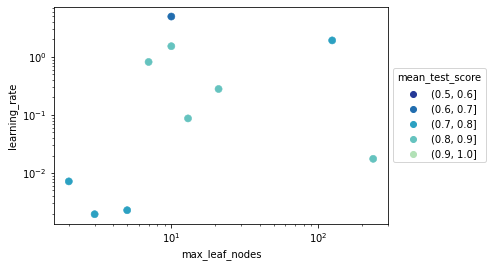

In [18]:
import seaborn as sns
import numpy as np

df = pd.DataFrame(
    {
        "max_leaf_nodes": cv_results["max_leaf_nodes"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.5, 1.0, 6)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df,
    x="max_leaf_nodes",
    y="learning_rate",
    hue="score_bin",
    s=50,
    color="k",
    edgecolor=None,
)
ax.set_xscale("log")
ax.set_yscale("log")

_ = ax.legend(title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5))